## 1. Import libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
path=r'C:\Users\Usha Bharati\Downloads\Chocolate Bar Ratings'

In [5]:
df_cleaned_1=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_cleaned_1.csv'))

## 2. Dataset check - The dataset has been wrangled, cleaned and checked for consistenices in the previous exercise. 

In [8]:
df_cleaned_1.columns

Index(['Company', 'Chocolate_origin', 'Review_number', 'Review_year',
       'Cocoa_percent', 'Company_location', 'Rating', 'Bean_type',
       'Bean_origin', 'Cocoa_category', 'Rating_category'],
      dtype='object')

In [7]:
df_cleaned_1.head()

,Company,Chocolate_origin,Review_number,Review_year,Cocoa_percent,Company_location,Rating,Bean_type,Bean_origin,Cocoa_category,Rating_category
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,6,Sao Tome,Mild Mocha,Fair
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,6,Togo,Moderate Blend,Fair
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,6,Togo,Moderate Blend,Fair
3,A. Morin,Akata,1680,2015,70.0,France,3.50,6,Togo,Moderate Blend,Fair
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,6,Peru,Moderate Blend,Fair


In [35]:
df_cleaned_1.isnull().sum()

Company             0
Chocolate_origin    0
Review_number       0
Review_year         0
Cocoa_percent       0
Company_location    0
Rating              0
Bean_type           0
Bean_origin         1
Cocoa_category      0
Rating_category     0
dtype: int64

#### One missing value in bean origin, but no action required at this stage for this column as it is just one single value.

In [36]:
dups=df_cleaned_1.duplicated()

In [37]:
dups.shape

(1795,)

### No duplicates found.

### Extreme values check

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_12192\2015468501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned_1['Rating'],bins=25)
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Density'>

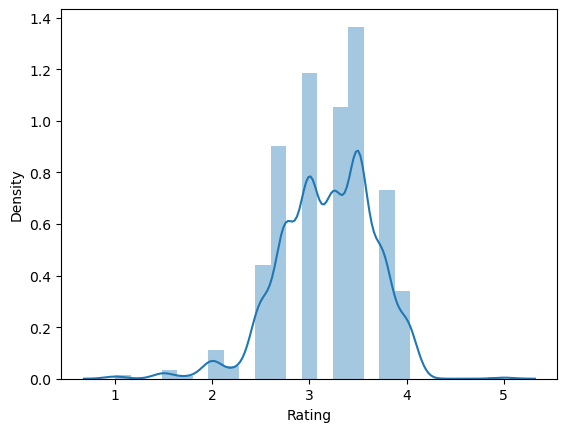

In [38]:
sns.distplot(df_cleaned_1['Rating'],bins=25)

### No extreme values observed above.

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_12192\2342236563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned_1['Cocoa_percent'],bins=25)
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cocoa_percent', ylabel='Density'>

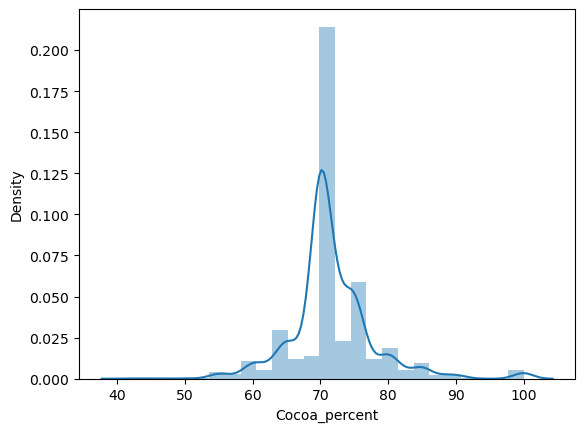

In [40]:
sns.distplot(df_cleaned_1['Cocoa_percent'],bins=25)

###  Most of the chocolate bars are found in the range of 70%

In [44]:
df_cleaned_1['Rating'].agg(['mean', 'median', 'max'])

mean      3.185933
median    3.250000
max       5.000000
Name: Rating, dtype: float64

In [43]:
df_cleaned_1['Cocoa_percent'].agg(['mean', 'median', 'max'])

mean       71.698329
median     70.000000
max       100.000000
Name: Cocoa_percent, dtype: float64

## HYPOTHESIS

###  In earlier analysis it is observed that as the cocoa percentage increases, the rating tends to decrease. This could imply that higher cocoa percentages might not be as palatable to all consumers, resulting in lower ratings on average. Also, there is a moderate negative correlation (-0.16) between cocoa percentage and rating.
### So, my hypothesis is that Chocolate bars with moderate and mild level of cocoa percentage have highest ratings.

### Chocolate bars are categorized as follows- 
### 'Mild mocha' contains <70%, 'Moderate blend' contains 70% to 80%,'Deep dark' contains above 80% of cocoa.

## 3.Data Prep for regression analysis

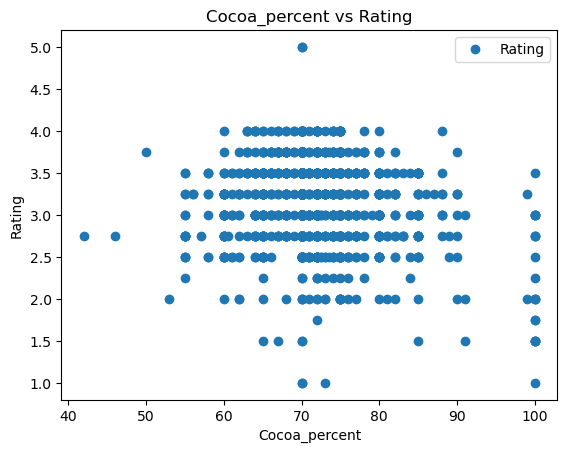

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_cleaned_1.plot(x = 'Cocoa_percent', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cocoa_percent vs Rating')  
plt.xlabel('Cocoa_percent')  
plt.ylabel('Rating')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_cleaned_1['Cocoa_percent'].values.reshape(-1,1)
y = df_cleaned_1['Rating'].values.reshape(-1,1)

In [17]:
X

array([[63.],
       [70.],
       [70.],
       ...,
       [65.],
       [62.],
       [65.]])

In [18]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4.Regression Analysis

In [20]:
# Create a regression object.

regression = LinearRegression()  

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
y_predicted = regression.predict(X_test)

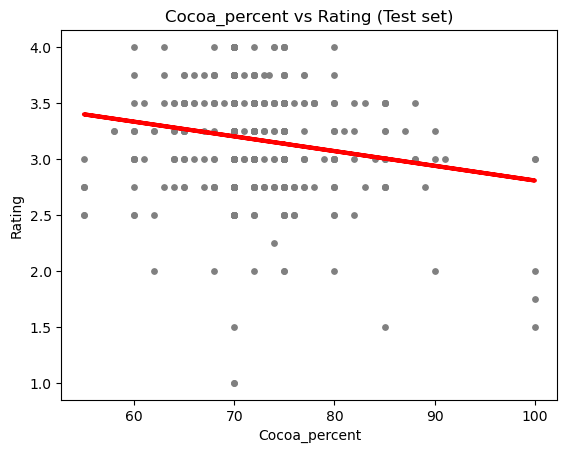

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa_percent vs Rating (Test set)')
plot_test.xlabel('Cocoa_percent')
plot_test.ylabel('Rating')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01313255]]
Mean squared error:  0.2095351310152622
R2 score:  0.01811002046167476


#### 1. The negative slope suggests that there's a decrease in the rating as the cocoa percentage increases. However, the magnitude of the slope indicates that the relationship is relatively weak.
#### 2. MSE is a small number here but lookibg at R2 score that is 0.0181, which means that approximately 1.81% of the variance in ratings can be explained by cocoa percentage according to this model. This suggests that cocoa percentage alone may not be a strong predictor of ratings, as the model explains only a small portion of the variability in ratings. 

In [26]:
y_predicted

array([[3.13545711],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.06979435],
       [3.39810813],
       [3.20111986],
       [3.13545711],
       [3.25365007],
       [3.26678262],
       [3.27991517],
       [3.20111986],
       [3.26678262],
       [3.20111986],
       [3.13545711],
       [3.06979435],
       [3.0041316 ],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.16172221],
       [3.39810813],
       [2.80714333],
       [3.33244537],
       [3.13545711],
       [3.13545711],
       [3.22738497],
       [3.20111986],
       [3.22738497],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.13545711],
       [3.20111986],
       [3.17485476],
       [3.27991517],
       [3.17485476],
       [3.20111986],
       [3.13545711],
       [3.26678262],
       [3.20111986],
       [3.39810813],
       [3.20111986],
       [3.33244537],
       [3.10919201],
       [3.135

In [27]:

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


### Comparing how the regression fits the training set

In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01313255]]
Mean squared error:  0.22774918296663346
R2 score:  0.029784249226460058


### Slope is the same as test set. Mean square is increased by 0.02 and R2 score shows approximately 2.98% of the variance in ratings according to this model compared to 1.81% in the test set. Though these scores are bigger but still indicate a poor model.

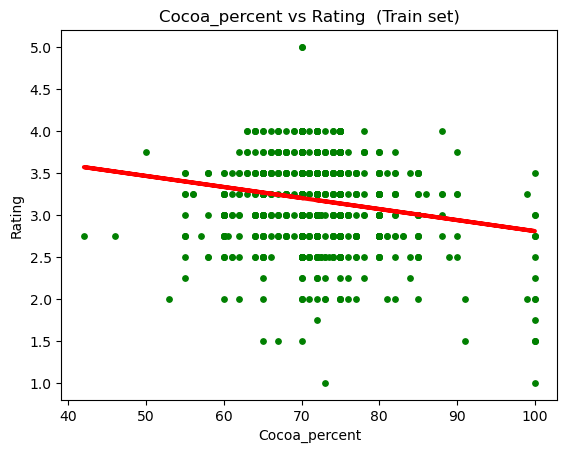

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa_percent vs Rating  (Train set)')
plot_test.xlabel('Cocoa_percent')
plot_test.ylabel('Rating')
plot_test.show()

  ### The low R square score, MSE scoreof 0.2095 in the test set is lower than that of the training set, it's still relatively high. This indicates that the model's predictions deviate significantly from the actual ratings on average, suggesting a lack of accuracy.
  ### y-Predicted values differ significantly from the actual values.
  ### These evidences support the fact that this prediction model is not a good fit.